## Lab | Cross Validation

Use logistic regression and decision tree classifier to fit the models and compute the accuracy of the models.

 1- Apply SMOTE for upsampling the data      
 2- Apply TomekLinks for downsampling

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
df=df[df['TotalCharges']!= " "]

In [5]:
pd.to_numeric(df['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [6]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
x=df[['tenure', 'SeniorCitizen', 'MonthlyCharges' , 'TotalCharges']]

In [8]:
x.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.5
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65


In [9]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x)
X=transformer.transform(x)

In [10]:
y= df['Churn']


In [11]:
y.value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

## SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

# SMOTE only can handle numerical features. Therefore, if we want to use categoricals they 
# will need to be dummyfied. However, for sake of simplicity we will not include the categoricals.

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 5163]
 ['Yes' 5163]]


### Tain/Test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [36]:
from sklearn.metrics import classification_report
predictions = classification.predict(X_test)


              precision    recall  f1-score   support

          No       0.62      0.85      0.72      1037
         Yes       0.76      0.49      0.59      1029

    accuracy                           0.67      2066
   macro avg       0.69      0.67      0.66      2066
weighted avg       0.69      0.67      0.66      2066



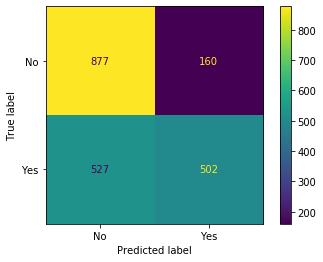

Cohen Kappa score 0.3340205798583903


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

lr_smote = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score',cohen_kappa_score(y_test, predictions))

## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
dt_smote = model.score(X_test, y_test)

print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the model is: 0.77


## TomekLinks

In [39]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)

unique, counts = np.unique(y_tl, return_counts=True)
print(np.asarray((unique, counts)).T)

[['No' 4634]
 ['Yes' 1869]]


### Tain/Test

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [42]:
from sklearn.metrics import classification_report
predictions = classification.predict(X_test)


The accuracy of the model on test set is: 0.67 
              precision    recall  f1-score   support

          No       0.62      0.85      0.72      1037
         Yes       0.76      0.49      0.59      1029

    accuracy                           0.67      2066
   macro avg       0.69      0.67      0.66      2066
weighted avg       0.69      0.67      0.66      2066



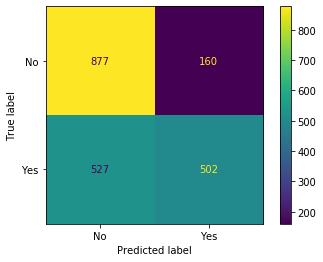

Cohen Kappa score 0.3340205798583903


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
lr_tom = accuracy_score(y_test, predictions)

confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
from sklearn.metrics import cohen_kappa_score
print('Cohen Kappa score',cohen_kappa_score(y_test, predictions))

## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
dt_tom=model.score(X_test, y_test)
print("The accuracy of the model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the model is: 0.76


In [49]:
accuracy = pd.DataFrame({'Logistic Regression':[round(lr_smote,2),round(lr_tom,2)],'Decision Tree Classifier':[round(dt_smote,2),round(dt_tom,2)]},index=['SMOTE','TomekLinks'])

In [50]:
accuracy

,Logistic Regression,Decision Tree Classifier
SMOTE,0.67,0.77
TomekLinks,0.67,0.76
